<a href="https://colab.research.google.com/github/datasciencejames/datasciencejames.github.io/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [66]:
from sklearn import neighbors, datasets

wine = datasets.load_wine()
X, y = wine.data, wine.target

X.shape

(178, 13)

In [67]:
knn = neighbors.KNeighborsClassifier()

knn.fit(X, y)

KNeighborsClassifier()

In [68]:
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [69]:

result = knn.predict([[2, 1, 4, 1,100,1,1,102,1,111,1,10.2,0]])

print(result,wine.target_names[result])

[1] ['class_1']


In [70]:


X2=np.array([[2, 1, 4, 1,100,1,1,102,1,111,1,10.2,0],[14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065],[12.93,3.8,2.65,18.6,102,2.41,2.41,.25,1.98,4.5,1.03,3.52,770]])
result = knn.predict(X2)

print(result,wine.target_names[result])

[1 0 2] ['class_1' 'class_0' 'class_2']


In [71]:
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_wine_knn():
    wine = datasets.load_wine()
    X = wine.data[:, 2:4]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
                #try 2:4 
    y = wine.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=1) #Try changing the number of neighbors
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('alcohol')
    pl.ylabel('malic acid')
    pl.axis('tight')

In [72]:
from sklearn import metrics
k_range = range(1, 100)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

print(scores)

[1.0, 0.8764044943820225, 0.8707865168539326, 0.8258426966292135, 0.7865168539325843, 0.7752808988764045, 0.7471910112359551, 0.7752808988764045, 0.7752808988764045, 0.7921348314606742, 0.7696629213483146, 0.7752808988764045, 0.7584269662921348, 0.7359550561797753, 0.7191011235955056, 0.7303370786516854, 0.7247191011235955, 0.7247191011235955, 0.7247191011235955, 0.7191011235955056, 0.7247191011235955, 0.7247191011235955, 0.7247191011235955, 0.7247191011235955, 0.7303370786516854, 0.7247191011235955, 0.7247191011235955, 0.7247191011235955, 0.7247191011235955, 0.7191011235955056, 0.7191011235955056, 0.7134831460674157, 0.7134831460674157, 0.7134831460674157, 0.7247191011235955, 0.7359550561797753, 0.7415730337078652, 0.7359550561797753, 0.7415730337078652, 0.7247191011235955, 0.7247191011235955, 0.7303370786516854, 0.7303370786516854, 0.7303370786516854, 0.7303370786516854, 0.7415730337078652, 0.7303370786516854, 0.7078651685393258, 0.7247191011235955, 0.7191011235955056, 0.719101123595

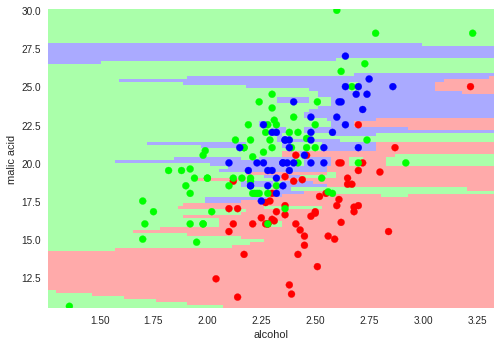

In [73]:
plot_wine_knn()

In [74]:
X, y = wine.data, wine.target

from sklearn.decomposition import PCA #import the PCA model from the decomposition model collection. Same syntax as before, but we don't have a y!
pca = PCA(n_components=2) # Create PCA model. Need to specify number of components. We will use 2, in order to be able to plot them in 2D space. n_components is a hyperparameter of the PCA model 
pca.fit(X)
X_reduced = pca.transform(X) #Dimensionality reduction models have a special function called transform, where you transform the data into the new 2 dimensions from the old 13. This changes the shape of your data!
print("Original dataset shape:",X.shape, "Reduced dataset shape:", X_reduced.shape)

Original dataset shape: (178, 13) Reduced dataset shape: (178, 2)


In [75]:
pca.components_ #the pca model has the property components_
# Naturally, since it create a mixture of all the input dimensions, each components has 4 terms. Then there are two components, with 4 terms each.  

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

In [76]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

PCA is simple, linear model, so we can even consturct the meaning of the 2 components (for other, more complex models this is not so straightforward):
0.002 x alcohol + -0.001 x malic_acid + 0.000 x ash + -0.005 x alcalinity_of_ash + 0.018 x magnesium + 0.001 x total_phenols + 0.002 x flavanoids + -0.000 x nonflavanoid_phenols + 0.001 x proanthocyanins + 0.002 x color_intensity + 0.000 x hue + 0.001 x od280/od315_of_diluted_wines + 1.000 x proline
0.001 x alcohol + 0.002 x malic_acid + 0.005 x ash + 0.026 x alcalinity_of_ash + 0.999 x magnesium + 0.001 x total_phenols + -0.000 x flavanoids + -0.001 x nonflavanoid_phenols + 0.005 x proanthocyanins + 0.015 x color_intensity + -0.001 x hue + -0.003 x od280/od315_of_diluted_wines + -0.018 x proline


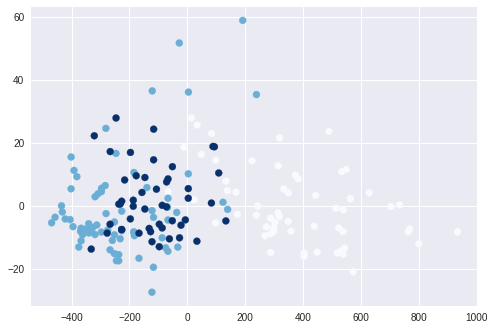

In [77]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='Blues')

print("PCA is simple, linear model, so we can even consturct the meaning of the 2 components (for other, more complex models this is not so straightforward):")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            wine.feature_names)))

In [78]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
pd.DataFrame(X_reduced)

In [80]:
wine_df = pd.DataFrame(X_reduced,y)

In [89]:
wine_df

,0,1
0,318.562979,21.492131
0,303.097420,-5.364718
0,438.061133,-6.537309
0,733.240139,0.192729
0,-11.571428,18.489995
...,...,...
2,-6.980211,-4.541137
2,3.131605,2.335191
2,88.458074,18.776285
2,93.456242,18.670819


In [82]:
wine_df.head(1)

,0,1
0,318.562979,21.492131


In [86]:
wine_df1 = wine_df.rename(columns={0:"Variable 1", 1:"Variable 2"})

In [ ]:
wine_df1

In [88]:
wine_df1.to_csv("wine.csv")